In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [ ]:
path = kagglehub.dataset_download("aravinii/house-price-prediction-treated-dataset")
houses = pd.read_csv(path + '/df_train.csv')

100%|██████████| 279k/279k [00:00<00:00, 839kB/s]

Extracting files...


In [ ]:
houses

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,2014-10-07,353950.0,3,3,False,302.86378,False,False,False,2,True,False,10,1
13599,2014-08-08,289950.0,2,2,False,155.14801,False,False,False,2,True,False,8,2
13600,2014-07-17,625504.0,2,3,True,117.98681,False,False,False,2,True,False,7,4
13601,2014-11-26,730000.0,3,5,False,340.02498,False,False,False,2,True,False,11,4


In [ ]:
houses.isna().sum()

,0
date,0
price,0
bedrooms,0
grade,0
has_basement,0
living_in_m2,0
renovated,0
nice_view,0
perfect_condition,0
real_bathrooms,0


<Axes: >

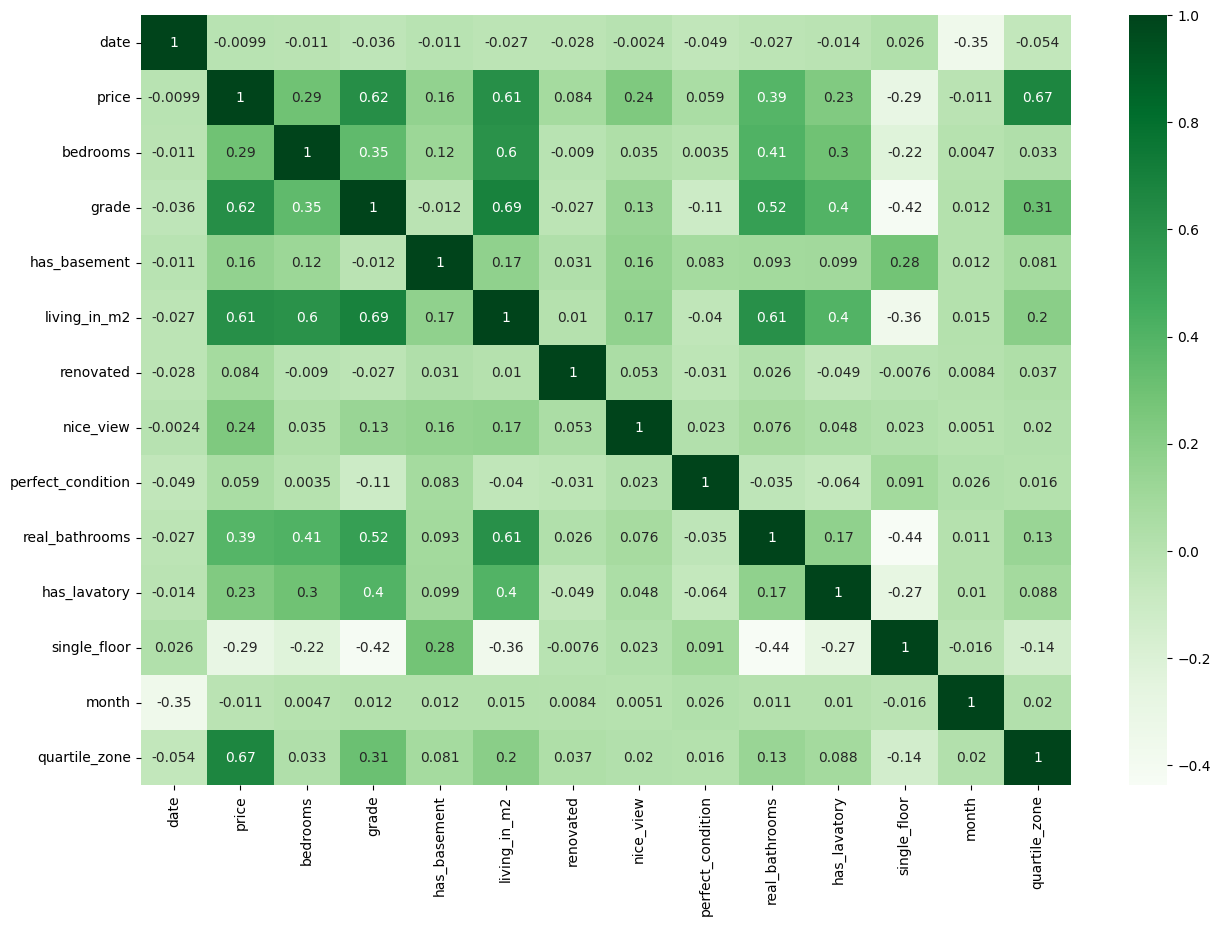

In [ ]:
corr = houses.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, ax=ax, cmap='Greens')

In [ ]:
houses.duplicated().sum()

2

In [ ]:
houses = houses.drop_duplicates(keep='first')

In [ ]:
houses.dtypes

,0
date,object
price,float64
bedrooms,int64
grade,int64
has_basement,bool
living_in_m2,float64
renovated,bool
nice_view,bool
perfect_condition,bool
real_bathrooms,int64


<ipython-input-10-0f4780a40779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['date'] = pd.to_datetime(houses['date'])


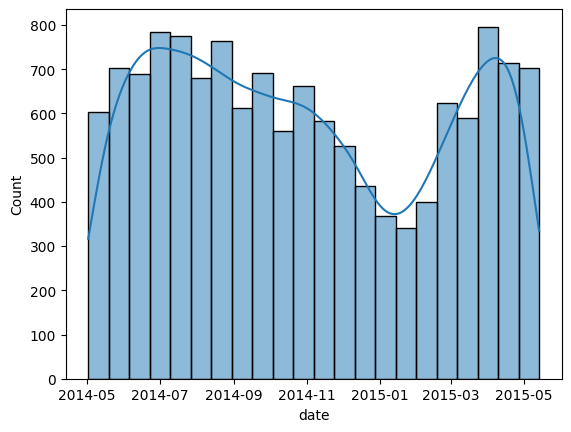

In [ ]:
houses['date'] = pd.to_datetime(houses['date'])
sns.histplot(x='date', data = houses, kde=True)
plt.show()

In [ ]:
houses.drop(columns=['date'], inplace=True)

<ipython-input-13-c7efd1569f6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses.drop(columns=['date'], inplace=True)


In [ ]:
houses

,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,353950.0,3,3,False,302.86378,False,False,False,2,True,False,10,1
13599,289950.0,2,2,False,155.14801,False,False,False,2,True,False,8,2
13600,625504.0,2,3,True,117.98681,False,False,False,2,True,False,7,4
13601,730000.0,3,5,False,340.02498,False,False,False,2,True,False,11,4


In [ ]:
from sklearn.model_selection import train_test_split
X = houses.drop(columns=['price'])
y = houses.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter ='best',
    min_samples_split = 128,
    max_depth = 8,
    max_leaf_nodes = 57
)

dt_model.fit(X = X_train, y=y_train)


DecisionTreeRegressor(max_depth=8, max_leaf_nodes=57, min_samples_split=128)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred, y_test)
print("R2: ", r2)

R2:  0.6299597325190347


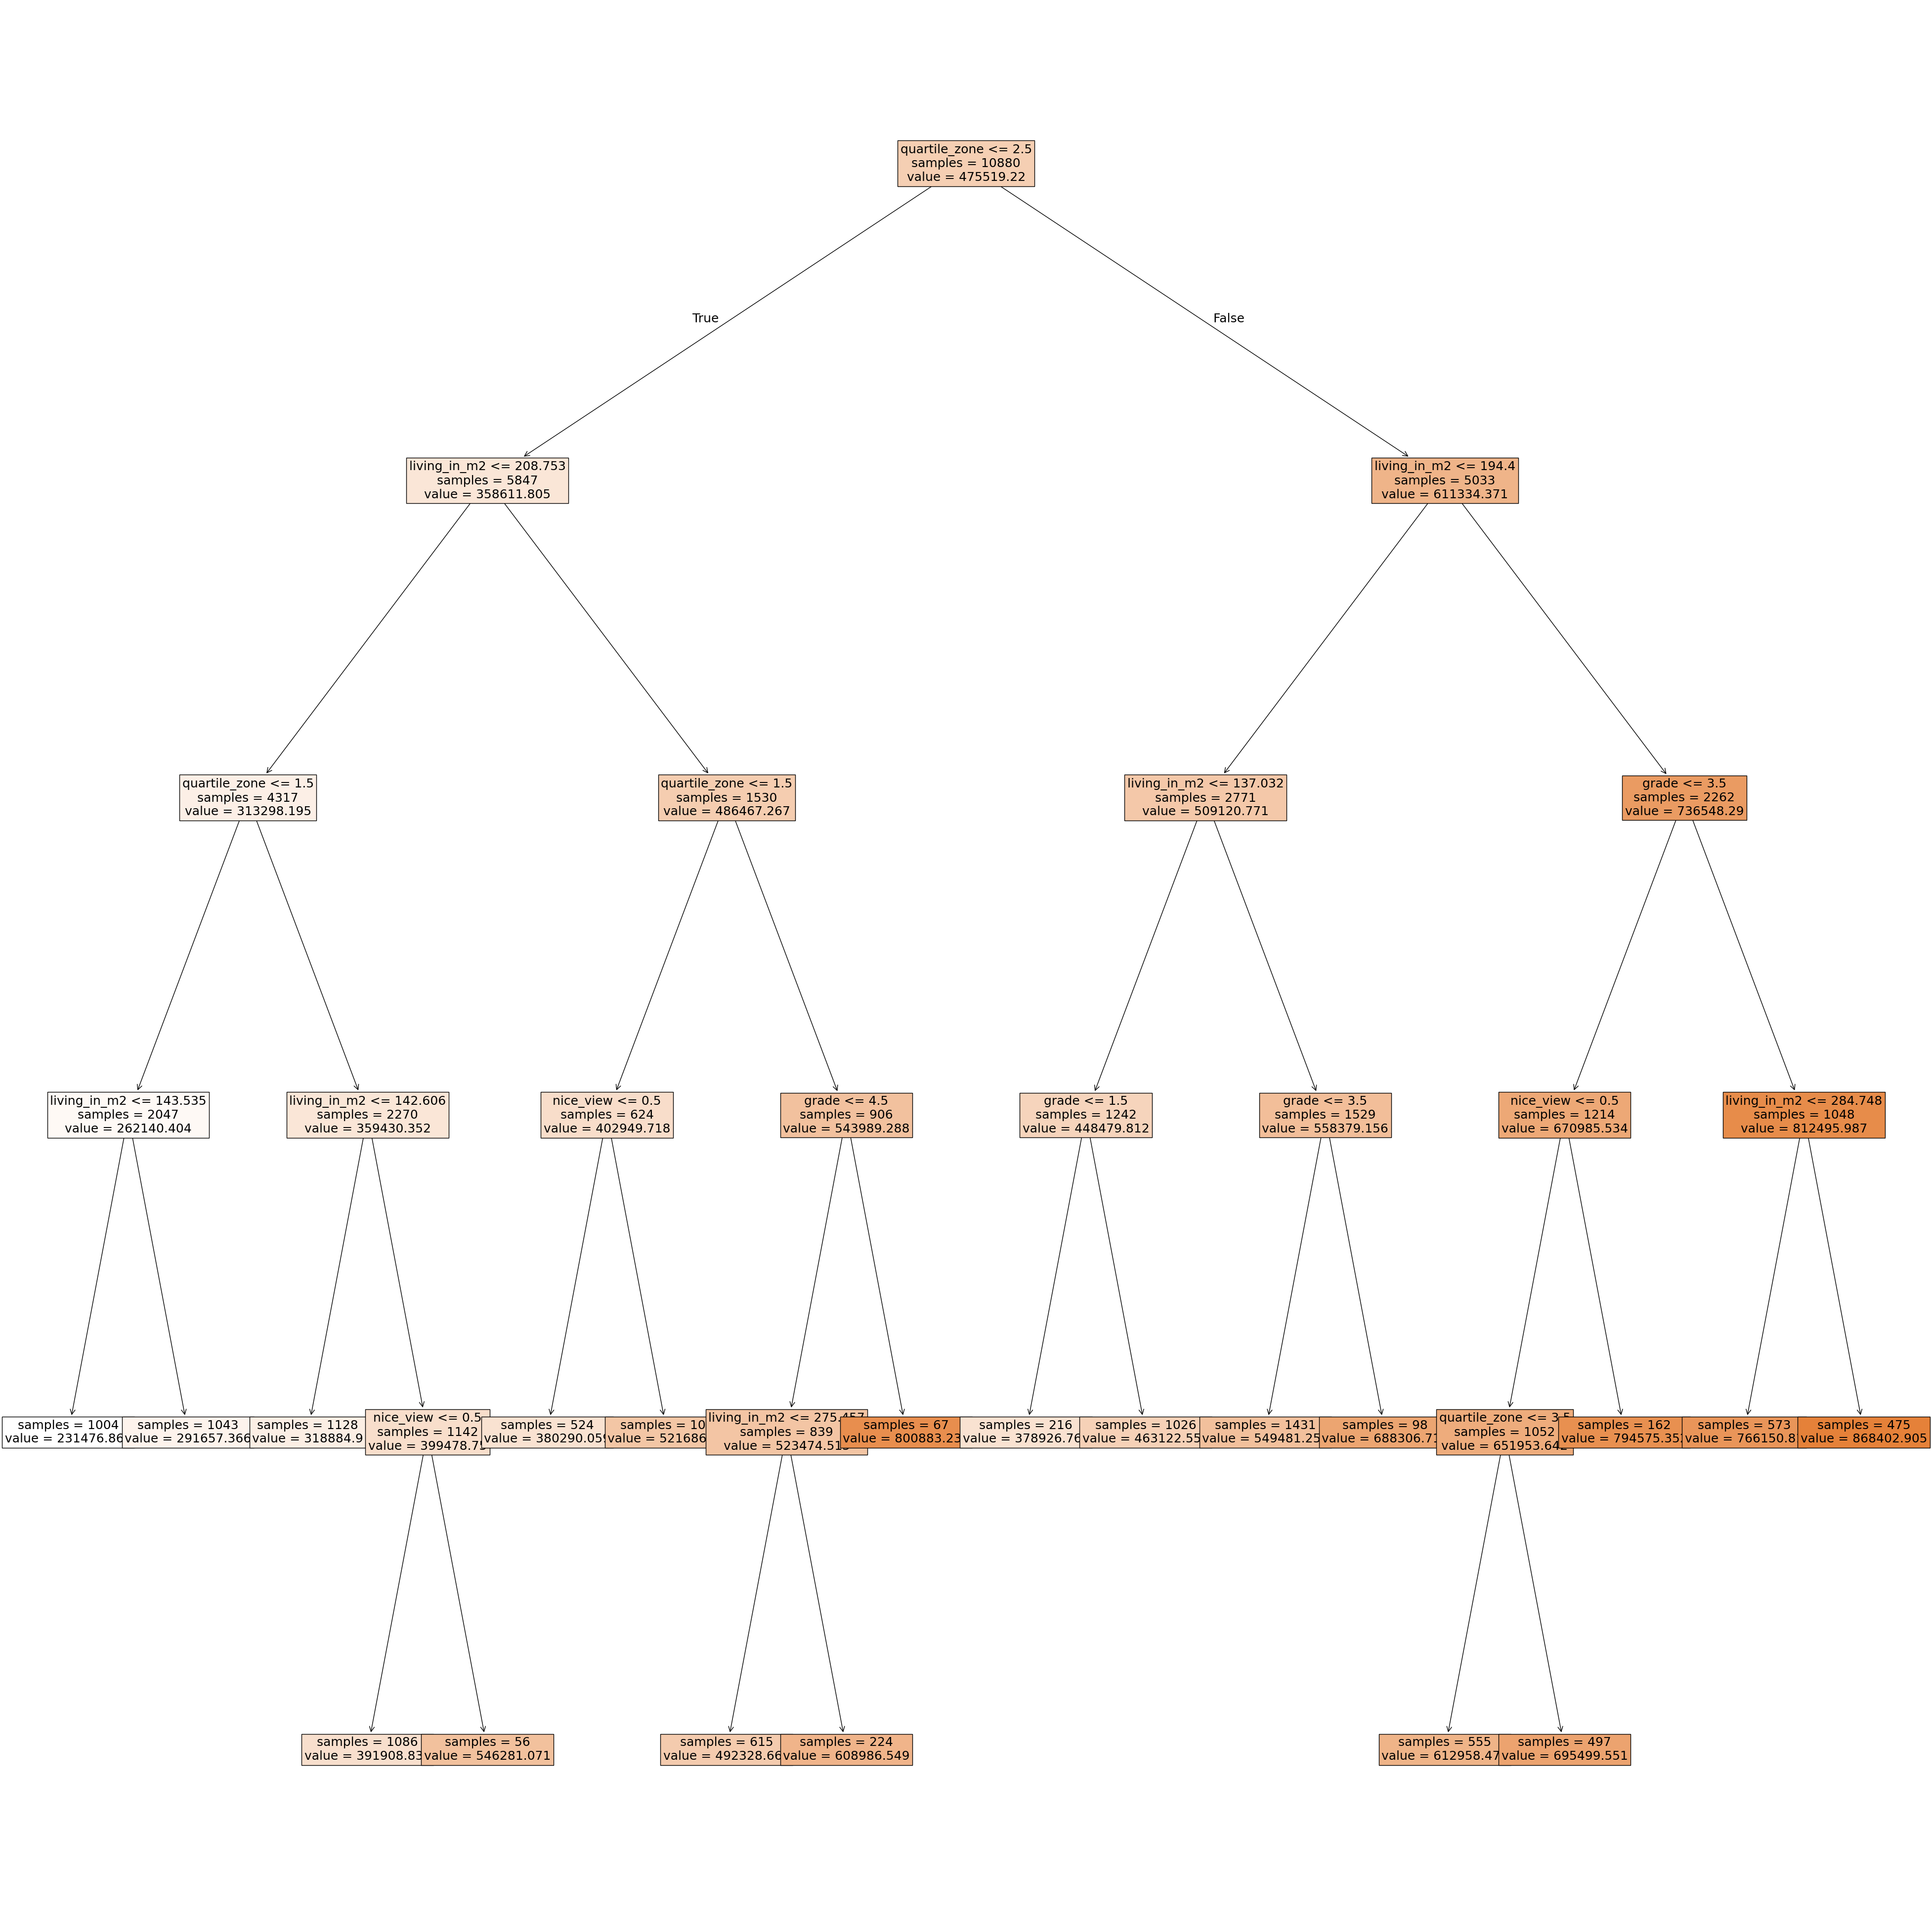

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 50))
plot_tree(dt_model, feature_names = houses.drop(columns=['price']).columns, impurity = False, filled=True, fontsize=18)
plt.show()

In [ ]:
## Are CART (Classification and Regression Trees) inclus
## In cazul regresiei, modelul imparte datele astfel incat sa minimizeze eroarea medie patratica (MSE) la fiecare split
## Setarea pragurilor se face in felul urmator:
## - Pentru fiecare caracteristica se iau valorile in ordine crescatoare
## - Se iau ca praguri mediile dintre 2 valori consecutive
## - Pentru fiecare astfel de prag se calculeaza MSE si se ia in considerare pragul si caracteristica cu MSE cel mai mic
## - Predictia finala este media valorilor din nodul frunza care respecta configuratia datelor primite

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': 57,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 128,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators = 70,
    criterion='squared_error',
    max_features=6,
    min_samples_split = 128,
    max_depth = 6,
    max_leaf_nodes = 37
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=6, max_leaf_nodes=37,
                      min_samples_split=128, n_estimators=70)

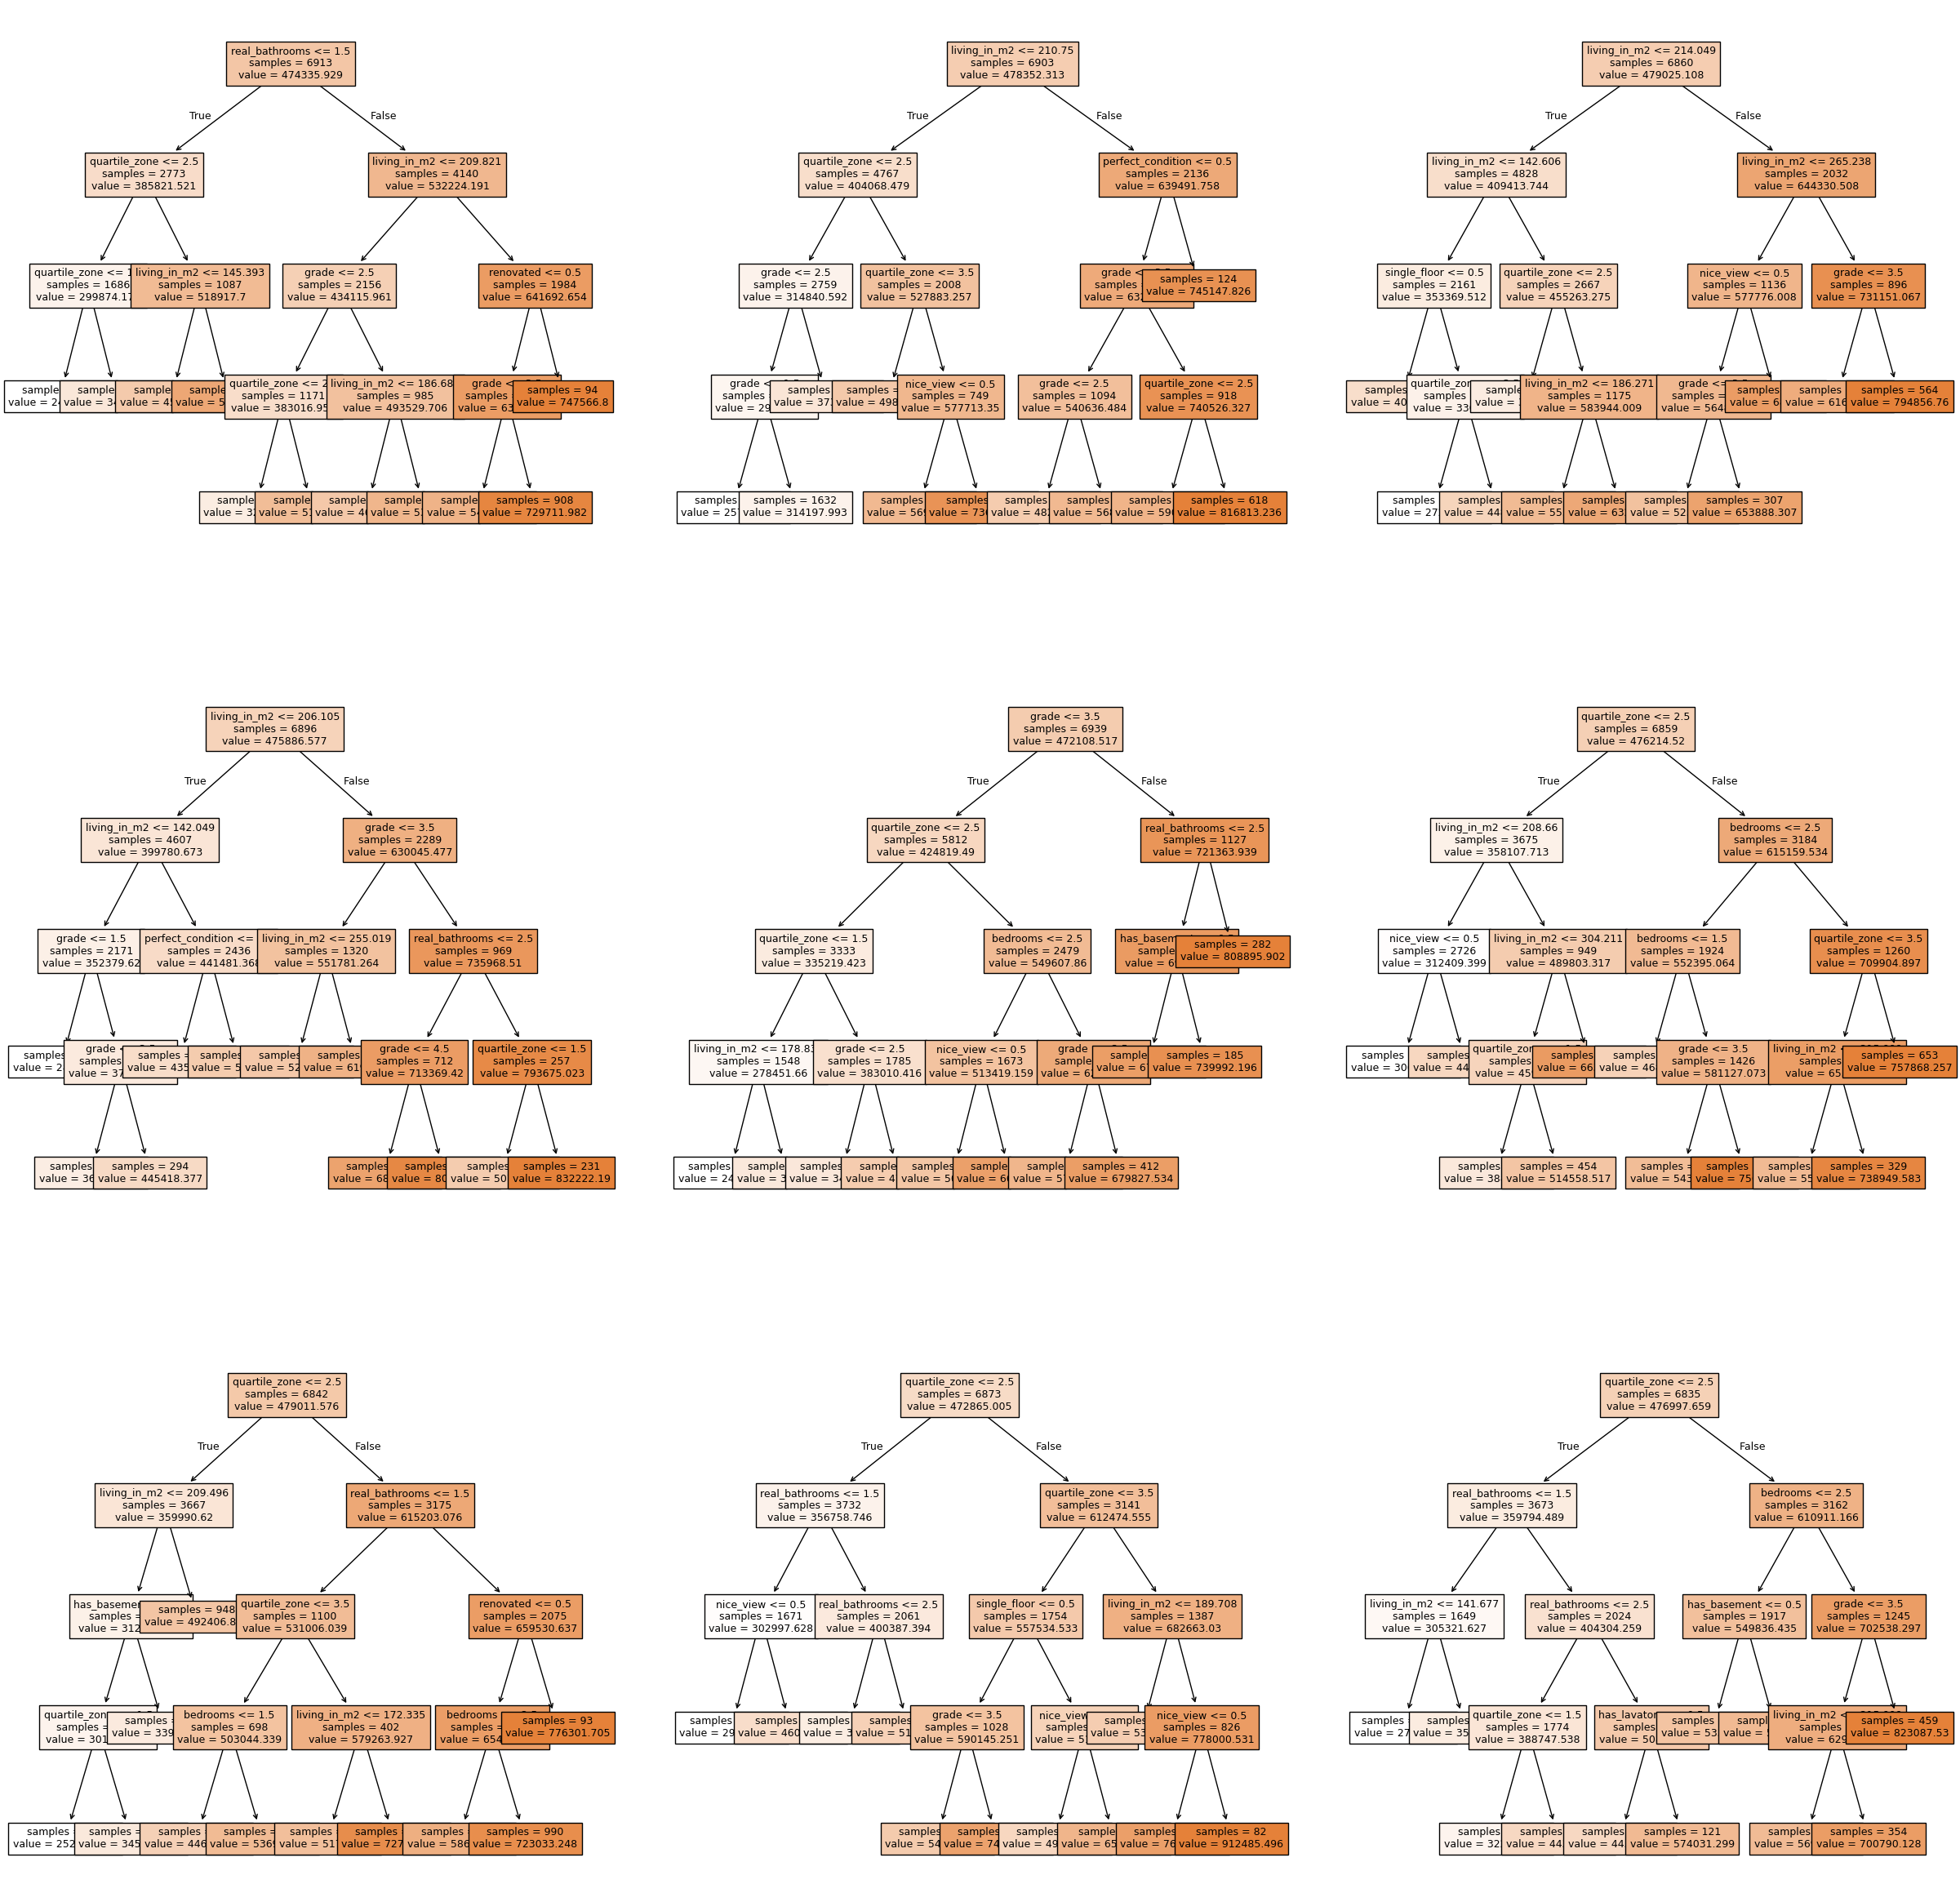

In [ ]:
def get_grid_coords(k, n):
  return k //n, k % n

fig, ax = plt.subplots(figsize=(30, 30), nrows = 3, ncols=3)
for k, rand_tree in enumerate(rf_model.estimators_):
  i, j = get_grid_coords(k ,3)
  plot_tree(
      rand_tree, feature_names = houses.drop(columns=['price']).columns, impurity = False, filled=True, fontsize=9, ax=ax[i][j]
  )
  fig.show()

In [ ]:
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_pred, y_test)
print("R2: ", r2)

R2:  0.6051459578268943


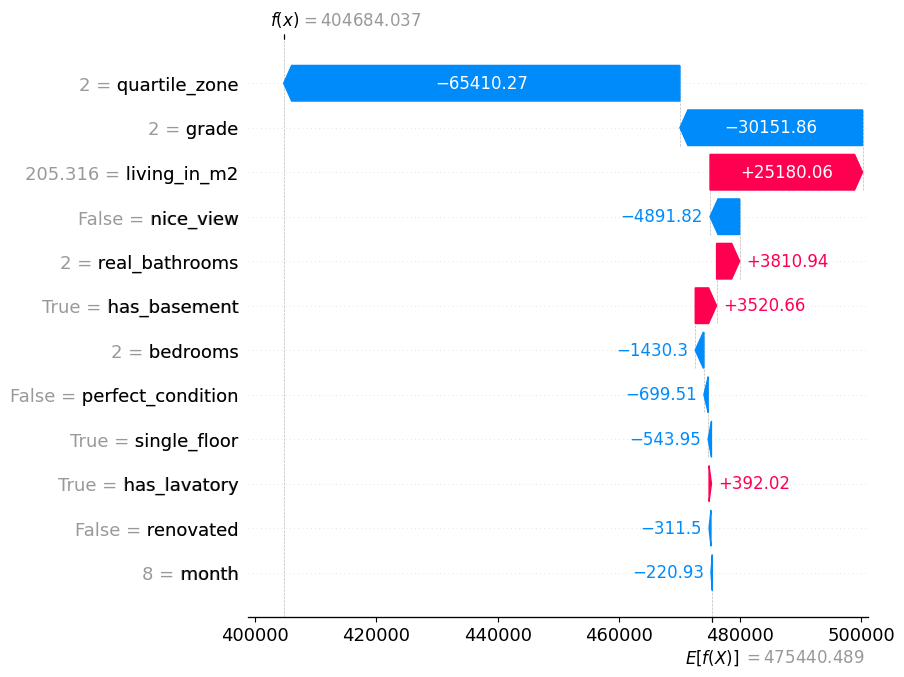

In [ ]:
## Folosit pentru a explica predictiile individuale de model
## Evidentiaza cat de mult fiecare feature a contribuit la predictia obtinuta
## E[x] - predictia medie asupra intregului set de test
## f(x) - este valoarea prezisa pentru exemplul mentionat
## Valorile shap sunt valorile de pe grafic si ne spun cat a contribuit fiecare feature la predictia individuala

import shap ## Shapley Additive Explanations
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf(X_test)
shap.waterfall_plot(shap_values_rf[46], max_display=20)


In [ ]:
y_pred[46]

404684.0365686406

In [ ]:
y_test.iloc[46]

507000.0

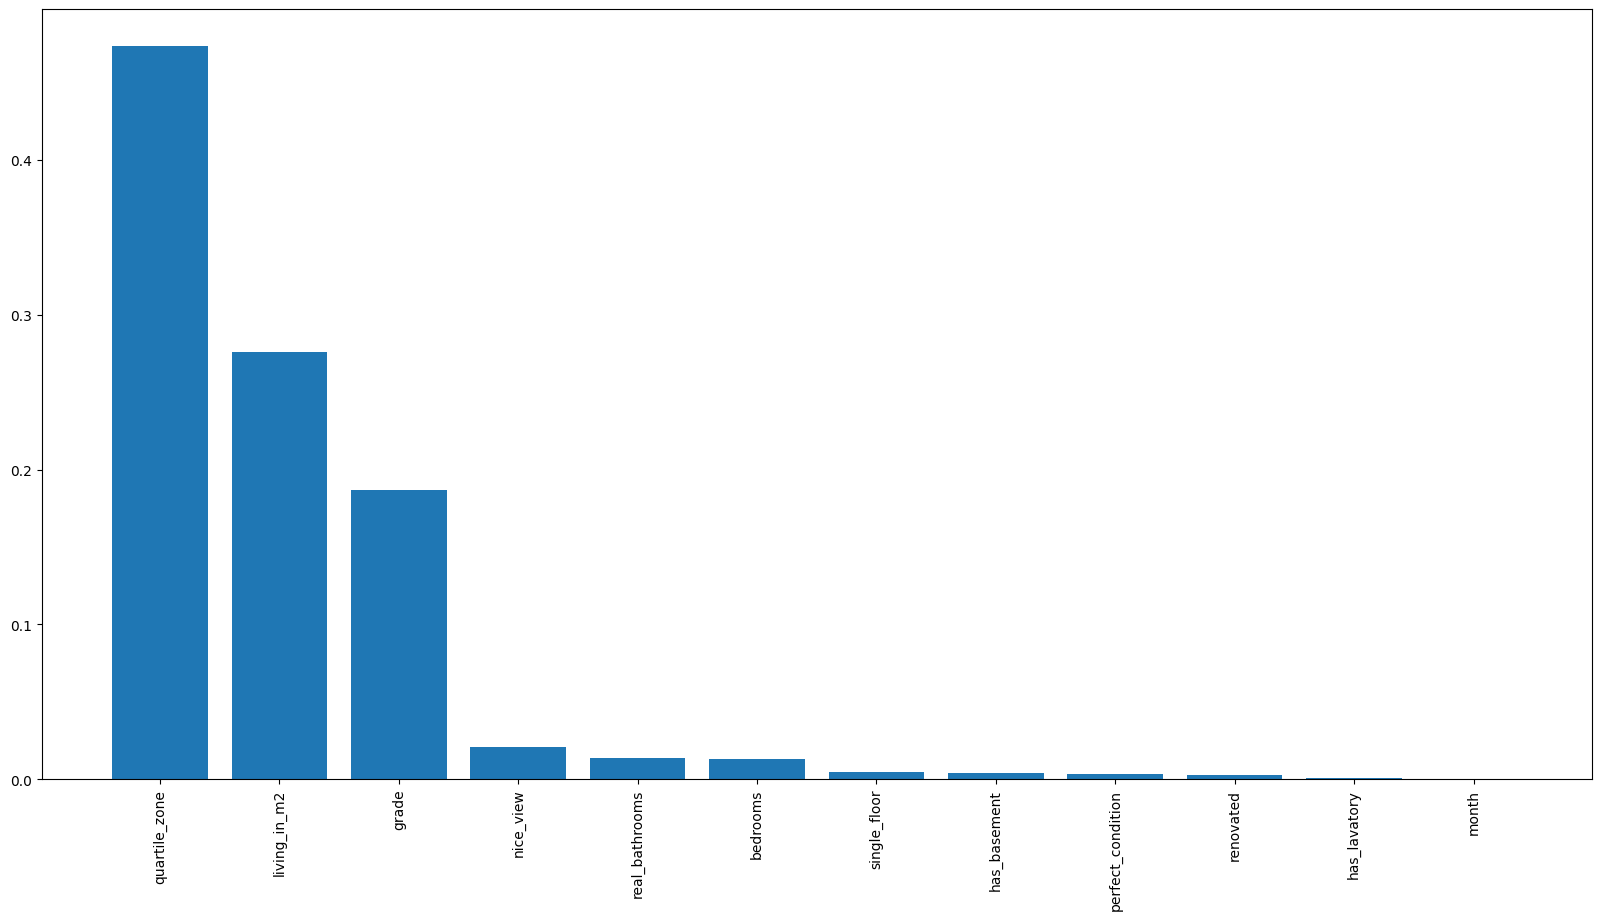

In [ ]:
feat_imp = rf_model.feature_importances_
sorted_indices = np.argsort(-feat_imp)

s1 = feat_imp[sorted_indices]
s2 = X_test.columns[sorted_indices]

plt.figure(figsize=(20, 10))
plt.bar(x = s2, height = s1)
plt.xticks(rotation=90)
plt.show()

In [ ]:
dt_model.tree_.n_node_samples

array([10880,  5847,  5033,  2771,  2262,  4317,  1530,  1214,  1048,
        2047,  2270,  1242,  1529,   624,   906,   839,    67,  1128,
        1142,  1052,   162,   573,   475,   615,   224,  1004,  1043,
         555,   497,  1431,    98,   524,   100,  1086,    56,   216,
        1026,   415,   158,   555,    60,   453,    71,  1334,    97,
         489,    66,   458,    31,   377,   751,   980,    63,   811,
         523,   183,    41,   432,   123,   237,   238,   715,    96,
         229,   268,   344,   114,   774,   312,   693,   333,   977,
          27,   219,   196,    90,    68,   218,    11,   270,   162,
         349,   628,   361,    92,   726,    25,   593,   387,   250,
          18,    98,    85,    32,   661,   196,    42,    66,   171,
         144,    27,   105,    57,   406,   309,   260,   263,   120,
         213,    54,   142,   234,    16], dtype=int64)